# Reporting of results sandbox

This notebook is a sandbox for working on the "Reporting of results" section of the review.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('paper')
sns.set_style('white')

In [2]:
fname = '../data/reporting_results.csv'
df = pd.read_csv(fname, header=0)
df = df.drop(columns=['Unnamed: 0', 'Title', 'Comment'])
df['Result'] = pd.to_numeric(df['Result'], errors='coerce')
df = df.dropna()

In [16]:
df.tail()

,Citation,Task,Metric,Model,Description,Result
729,Naderi2010,seizure detection,accuracy,arch1,RNN,1.0000
730,Naderi2010,seizure detection,accuracy,arch2,MLPNN,0.9893
731,Naderi2010,seizure detection,accuracy,dl1,NN,0.9720
732,Naderi2010,seizure detection,accuracy,trad1,Wavelet,0.9483
733,Bu2010,motor imagery,accuracy,arch1,model,0.7858


In [17]:
def extract_model_type(x):
    if 'arch' in x:
        out = 'Proposed'
    elif 'trad' in x:
        out = 'Baseline (traditional)'
    elif 'dl' in x:
        out = 'Baseline (deep learning)'
    else:
        raise ValueError('Model type {} not supported.'.format(x))
    
    return out

df['model_type'] = df['Model'].apply(extract_model_type)

In [18]:
# Extract accuracy rows only
acc_df = df[df['Metric'] == 'accuracy']

In [19]:
# Create new column that contains both citation and task information
acc_df['citation_task'] = acc_df[['Citation', 'Task']].apply(lambda x: ' ['.join(x) + ']', axis=1)

# Create a new column with the year
acc_df['year'] = acc_df['Citation'].apply(lambda x: int(x[x.find('2'):x.find('2') + 4]))

/home/hubert/miniconda3/envs/dl-eeg/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/hubert/miniconda3/envs/dl-eeg/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [20]:
# Order by average proposed model accuracy
# acc_ind = acc_df[acc_df['model_type']=='Proposed'].groupby('Citation').mean().sort_values(by='year').index
acc_ind = acc_df[acc_df['model_type']=='Proposed'].groupby('Citation').mean().sort_values(by='Result').index
acc_df['Citation'] = acc_df['Citation'].astype('category')
acc_df['Citation'].cat.set_categories(acc_ind, inplace=True)
acc_df = acc_df.sort_values(['Citation'])

/home/hubert/miniconda3/envs/dl-eeg/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [21]:
acc_df

,Citation,Task,Metric,Model,Description,Result,model_type,citation_task,year
640,Stober2015,music imagery (64 Hz),accuracy,trad1,raw + SVC,0.1480,Baseline (traditional),Stober2015 [music imagery (64 Hz)],2015
641,Stober2015,music imagery (64 Hz),accuracy,arch1,Encoder + CNN maj,0.2780,Proposed,Stober2015 [music imagery (64 Hz)],2015
705,Stober2014,musical rhythm classification,accuracy,trad1,SVM-1 bar,0.2430,Baseline (traditional),Stober2014 [musical rhythm classification],2014
704,Stober2014,musical rhythm classification,accuracy,arch1,CNN-1bar,0.3580,Proposed,Stober2014 [musical rhythm classification],2014
572,Sun2016,speech classification,accuracy,trad1,SVM,0.2091,Baseline (traditional),Sun2016 [speech classification],2016
571,Sun2016,speech classification,accuracy,arch3,NES-G,0.4327,Proposed,Sun2016 [speech classification],2016
570,Sun2016,speech classification,accuracy,arch2,NES-B,0.3900,Proposed,Sun2016 [speech classification],2016
569,Sun2016,speech classification,accuracy,arch1,NES-I,0.3436,Proposed,Sun2016 [speech classification],2016
292,Deiss2018,clinical features classification,accuracy,dl2,MLP,0.2314,Baseline (deep learning),Deiss2018 [clinical features classification],2018
289,Deiss2018,clinical features classification,accuracy,arch1,HAMLET-CNN,0.4075,Proposed,Deiss2018 [clinical features classification],2018


In [22]:
# Only keep 2 best per task and model type
acc2_df = acc_df.sort_values(['Citation', 'Task', 'model_type', 'Result'], ascending=True).groupby(
                ['Citation', 'Task', 'model_type']).tail(2)

Text(0,0.5,'')

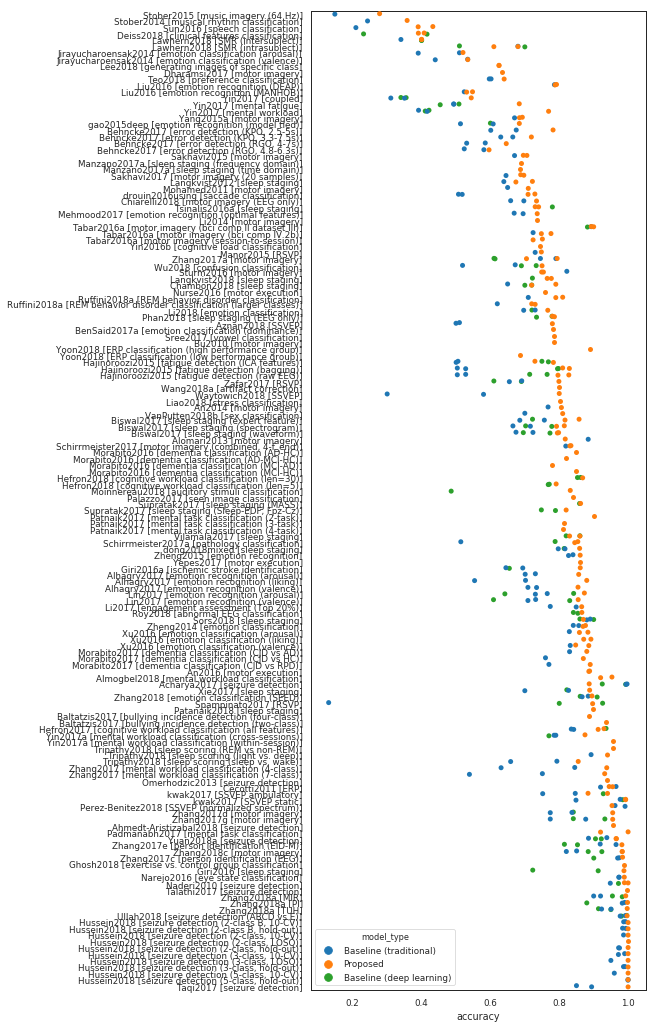

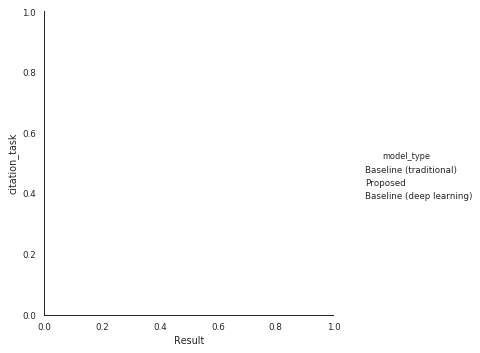

In [23]:
fig, ax = plt.subplots(figsize=(6, 18));
sns.catplot(y='citation_task', x='Result', hue='model_type', data=acc2_df, ax=ax);
ax.set_xlabel('accuracy')
ax.set_ylabel('')

## Looking at the difference in accuracy

In [24]:
# Only keep the maximum accuracy per citation & task
best_df = acc_df.groupby(['Citation', 'Task', 'model_type'])['Result'].max().reset_index()

# Only keep citations/tasks that have a traditional baseline
best_df = best_df.groupby(['Citation', 'Task']).filter(lambda x: 'Baseline (traditional)' in x.values).reset_index()

#  Compute difference between proposed and traditional baseline
diff_df = best_df.groupby(['Citation', 'Task']).apply(
            lambda x: x[x['model_type'] == 'Proposed']['Result'].iloc[0] - \
                      x[x['model_type'] == 'Baseline (traditional)']['Result'].iloc[0]).reset_index()
diff_df = diff_df.rename(columns={0: 'acc_diff'})

In [25]:
diff_df.describe()

,acc_diff
count,102.000000
mean,0.081893
std,0.108614
min,-0.110000
25%,0.015850
50%,0.054000
75%,0.110000
max,0.767000


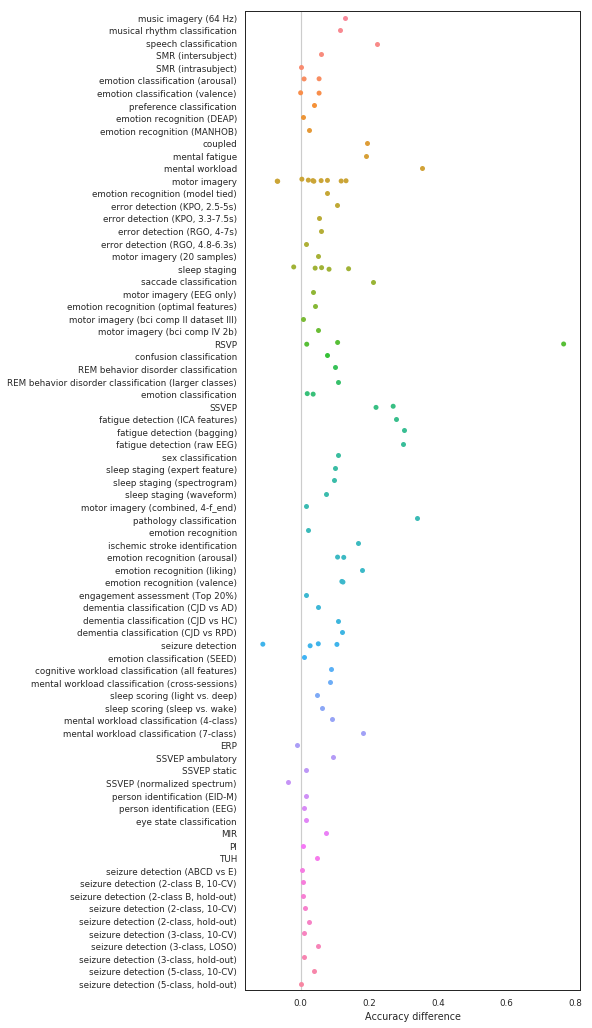

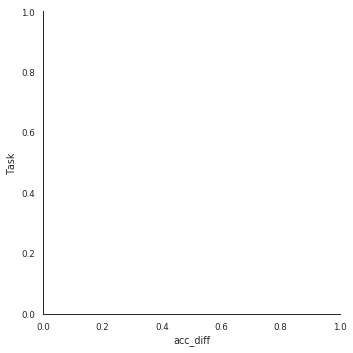

In [26]:
fig, ax = plt.subplots(figsize=(6, 18));
sns.catplot(y='Task', x='acc_diff', data=diff_df, ax=ax);
ax.set_xlabel('Accuracy difference')
ax.set_ylabel('')
ax.axvline(0, c='k', alpha=0.2)

Text(0,0.5,'Number of studies')

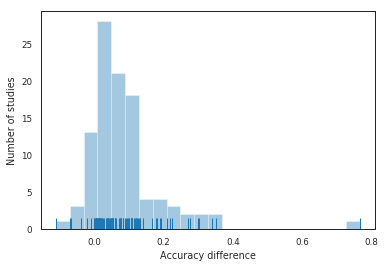

In [27]:
fig, ax = plt.subplots()
sns.distplot(diff_df['acc_diff'], kde=False, rug=True, ax=ax)
ax.set_xlabel('Accuracy difference')
ax.set_ylabel('Number of studies')

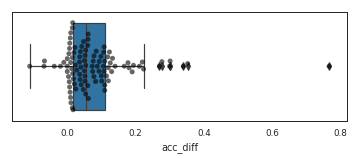

In [28]:
fig, ax = plt.subplots(figsize=(6, 2))
ax = sns.boxplot(x='acc_diff', data=diff_df)
ax = sns.swarmplot(x='acc_diff', data=diff_df, color="0", alpha=0.6)

In [29]:
# Pivot dataframe to plot proposed vs. baseline accuracy as a scatterplot
best_df['citation_task'] = best_df[['Citation', 'Task']].apply(lambda x: ' ['.join(x) + ']', axis=1)
acc_comparison_df = best_df.pivot(index='citation_task', columns='model_type', values='Result')

(0, 1.1)

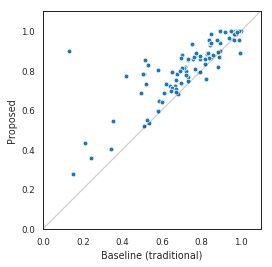

In [30]:
fig, ax = plt.subplots()
sns.scatterplot(data=acc_comparison_df, x='Baseline (traditional)', y='Proposed', ax=ax)
ax.plot([0, 1.1], [0, 1.1], c='k', alpha=0.2)
plt.axis('square')
ax.set_xlim([0, 1.1])
ax.set_ylim([0, 1.1])

## Adding in domain information

In [26]:
def load_data_items(start_year=2010):
    """Load data items table.

    TODO:
    - Normalize column names?
    - Double check all the required columns are there?
    """
    fname = '../data/data_items.csv'
    df = pd.read_csv(fname, header=1)

    # A little cleaning up
    df = df.dropna(axis=0, how='all')
    df = df.dropna(axis=1, how='all', thresh=int(df.shape[0] * 0.1))
    df = df[df['Year'] >= start_year]

    return df

In [27]:
data_items_df = load_data_items(start_year=2010)
domains_df = data_items_df.filter(regex='(?=Domain*|Citation)')

In [43]:
data_items_df.shape[0]

156

In [150]:
100 - 100 * data_items_df['Statistical analysis of performance'].value_counts()['No'] / data_items_df.shape[0]

19.871794871794876

In [35]:
# Concatenate domains into one string
def concat_domains(x):
    domain = ''
    for i in x[1:]:
        if isinstance(i, str):
            domain += i + '/'
    return domain[:-1]

domains_df['domain'] = data_items_df.filter(regex='(?=Domain*)').apply(concat_domains, axis=1)

/home/hubert/miniconda3/envs/dl-eeg/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [36]:
diff_domain_df = diff_df.merge(domains_df, on='Citation', how='left')
diff_domain_df = diff_domain_df.sort_values(by='domain')
diff_domain_df.head()

,Citation,Task,acc_diff,Domain 1,Domain 2,Domain 3,Domain 4,domain
3,Lawhern2018,SMR (intersubject),0.0600,Classification of EEG signals,BCI,Active & Reactive,MI & ERP,BCI/Active & Reactive/MI & ERP
4,Lawhern2018,SMR (intrasubject),0.0000,Classification of EEG signals,BCI,Active & Reactive,MI & ERP,BCI/Active & Reactive/MI & ERP
27,Tabar2016a,motor imagery (bci comp IV 2b),0.0520,Classification of EEG signals,BCI,Active,Motor imagery,BCI/Active/Motor imagery
84,Zhang2018c,motor imagery,0.1326,Classification of EEG signals,BCI,Active,Motor imagery,BCI/Active/Motor imagery
22,Mohamed2011,motor imagery,0.0600,Classification of EEG signals,BCI,Active,Motor imagery,BCI/Active/Motor imagery


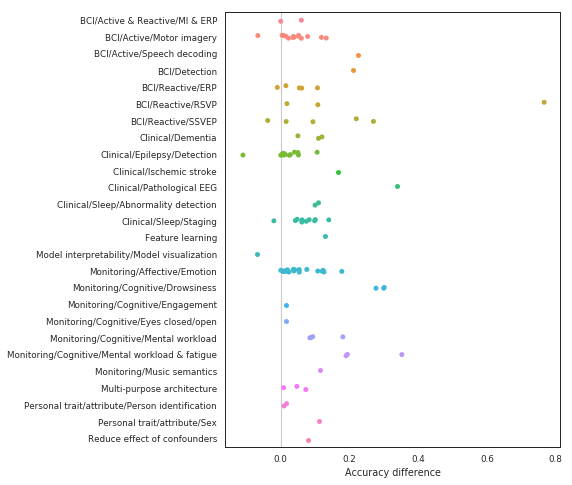

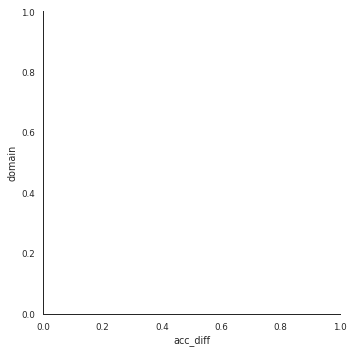

In [37]:
fig, ax = plt.subplots(figsize=(6, 8));
sns.catplot(y='domain', x='acc_diff', jitter=True, data=diff_domain_df, ax=ax);
ax.set_xlabel('Accuracy difference')
ax.set_ylabel('')
ax.axvline(0, c='k', alpha=0.2)

/home/hubert/miniconda3/envs/dl-eeg/lib/python3.6/site-packages/seaborn/categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5,0,'Accuracy difference')

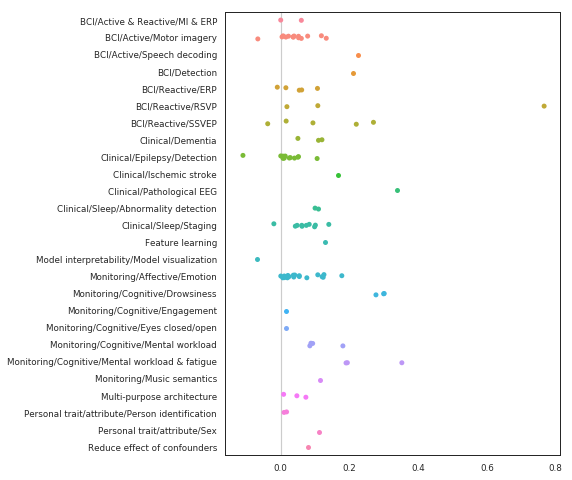

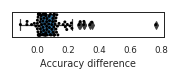

In [66]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(6, 50))
gs1 = gridspec.GridSpec(6, 1)
gs1.update(hspace=0.025) # set the spacing between axes. 

ax1 = plt.subplot(gs1[0])
sns.catplot(y='domain', x='acc_diff', size=3, jitter=True, data=diff_domain_df, ax=ax1);
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.axvline(0, c='k', alpha=0.2)

ax2 = plt.subplot(gs1[1])
sns.boxplot(x='acc_diff', data=diff_df, ax=ax2)
sns.swarmplot(x='acc_diff', data=diff_df, color="0", size=3, ax=ax2)
ax2.axvline(0, c='k', alpha=0.2)
ax2.set_xlabel('Accuracy difference')

In [128]:
diff_df.nlargest(1, 'acc_diff')['Citation'].values[0]

'Spampinato2017'

/home/hubert/miniconda3/envs/dl-eeg/lib/python3.6/site-packages/seaborn/categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


count    102.000000
mean       0.081893
std        0.108614
min       -0.110000
25%        0.015850
50%        0.054000
75%        0.110000
max        0.767000
Name: acc_diff, dtype: float64
iqr	0.094150


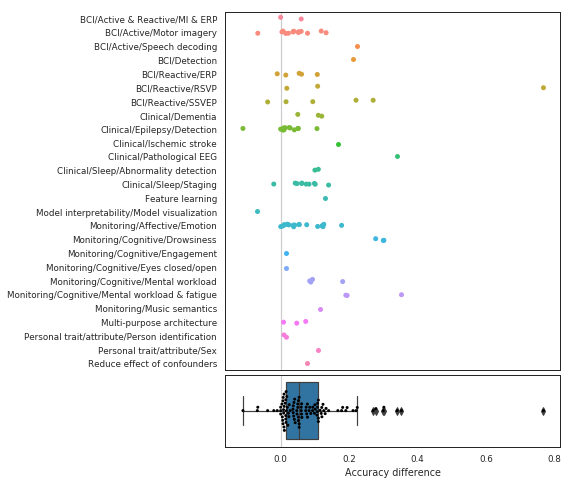

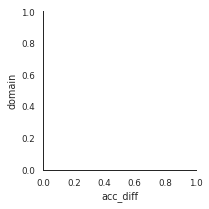

In [76]:
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(6, 8), gridspec_kw = {'height_ratios':[5, 1]});

sns.catplot(y='domain', x='acc_diff', size=3, jitter=True, data=diff_domain_df, ax=axes[0]);
axes[0].set_xlabel('')
axes[0].set_ylabel('')
axes[0].axvline(0, c='k', alpha=0.2)

sns.boxplot(x='acc_diff', data=diff_df, ax=axes[1])
sns.swarmplot(x='acc_diff', data=diff_df, color="0", size=3, ax=axes[1])
axes[1].axvline(0, c='k', alpha=0.2)
axes[1].set_xlabel('Accuracy difference')

fig.subplots_adjust(wspace=0, hspace=0.02)

iqr = diff_df['acc_diff'].quantile(.75) - diff_df['acc_diff'].quantile(.25)
print(diff_df['acc_diff'].describe())
print('iqr\t{:.6f}'.format(iqr))

## Inspection/visualization techniques

In [39]:
# Separate rows that contain multiple values into multiple rows
def lstrip(list_of_strs):
    """Remove left space and make lowercase."""
    return [a.lstrip().lower() for a in list_of_strs] 

data_items_df['inspection_list'] = data_items_df['Model inspection (clean)'].str.split(',').apply(lstrip)

inspection_per_article = list()
for i, items in data_items_df[['Citation', 'inspection_list']].iterrows():
    for m in items['inspection_list']:
        inspection_per_article.append([i, items['Citation'], m])
        
inspection_df = pd.DataFrame(inspection_per_article, columns=['paper nb', 'Citation', 'inspection method'])

# Replace "no" by "None"
inspection_df['inspection method'][inspection_df['inspection method'] == 'no'] = 'None'

/home/hubert/miniconda3/envs/dl-eeg/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [40]:
inspection_df.head()

,paper nb,Citation,inspection method
0,0,Almogbel2018,None
1,1,Yang2018,None
2,2,Patanaik2018,None
3,3,Hussein2018,None
4,4,Perez-Benitez2018,analysis of weights


In [103]:
(inspection_df['inspection method'].value_counts() / inspection_df.shape[0])['None'] 

0.7300613496932515

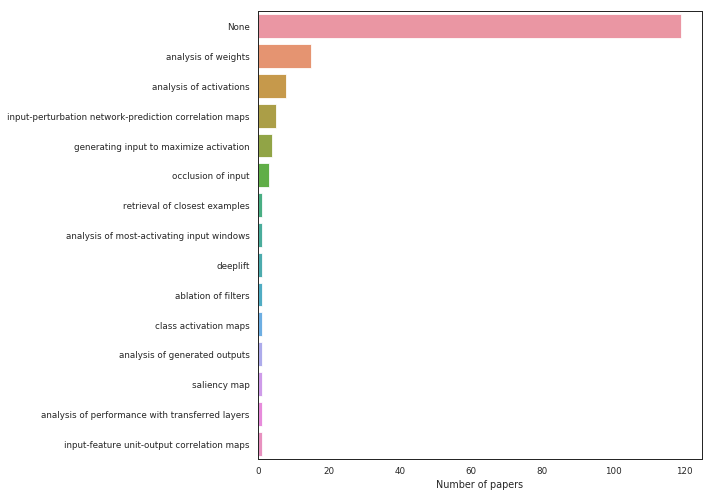

In [41]:
# Removing low count categories
cutoff = 1

inspection_counts = inspection_df['inspection method'].value_counts()
inspection_df = inspection_df[inspection_df['inspection method'].isin(
    inspection_counts[(inspection_counts >= cutoff)].index)]

fig, ax = plt.subplots(figsize=(10, 7))
ax = sns.countplot(y='inspection method', data=inspection_df, 
                   order=inspection_df['inspection method'].value_counts().index)
ax.set_xlabel('Number of papers')
ax.set_ylabel('')
plt.tight_layout()

In [42]:
# Percentages
inspection_df['inspection method'].value_counts() / len(np.unique(inspection_df['Citation']))

None                                                      0.762821
analysis of weights                                       0.096154
analysis of activations                                   0.051282
input-perturbation network-prediction correlation maps    0.032051
generating input to maximize activation                   0.025641
occlusion of input                                        0.019231
retrieval of closest examples                             0.006410
analysis of most-activating input windows                 0.006410
deeplift                                                  0.006410
ablation of filters                                       0.006410
class activation maps                                     0.006410
analysis of generated outputs                             0.006410
saliency map                                              0.006410
analysis of performance with transferred layers           0.006410
input-feature unit-output correlation maps                0.00

In [43]:
# List of citations per category
inspection_categories = inspection_df.groupby('inspection method')['Citation'].apply(list)
inspection_categories['generating input to maximize activation']

['VanPutten2018b', 'Ruffini2018a', 'Sors2018', 'Bashivan2016a']

## Origin

Conference    58
Journal       49
Preprint      48
Supplement     1
Name: Type of paper, dtype: int64


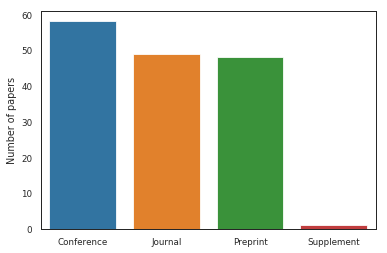

In [131]:
fig, ax = plt.subplots()
sns.countplot(data_items_df['Type of paper'], ax=ax)
ax.set_xlabel('')
ax.set_ylabel('Number of papers')

print(data_items_df['Type of paper'].value_counts())

No     85
Yes    23
Name: Preprint first, dtype: int64


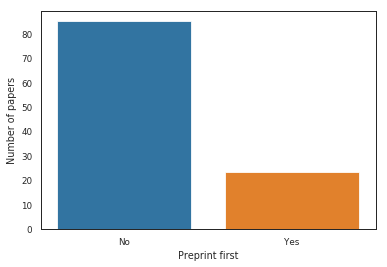

In [45]:
fig, ax = plt.subplots()
sns.countplot(data_items_df[data_items_df['Type of paper'] != 'Preprint']['Preprint first'])
ax.set_ylabel('Number of papers')

print(data_items_df[data_items_df['Type of paper'] != 'Preprint']['Preprint first'].value_counts())

(0, 5)

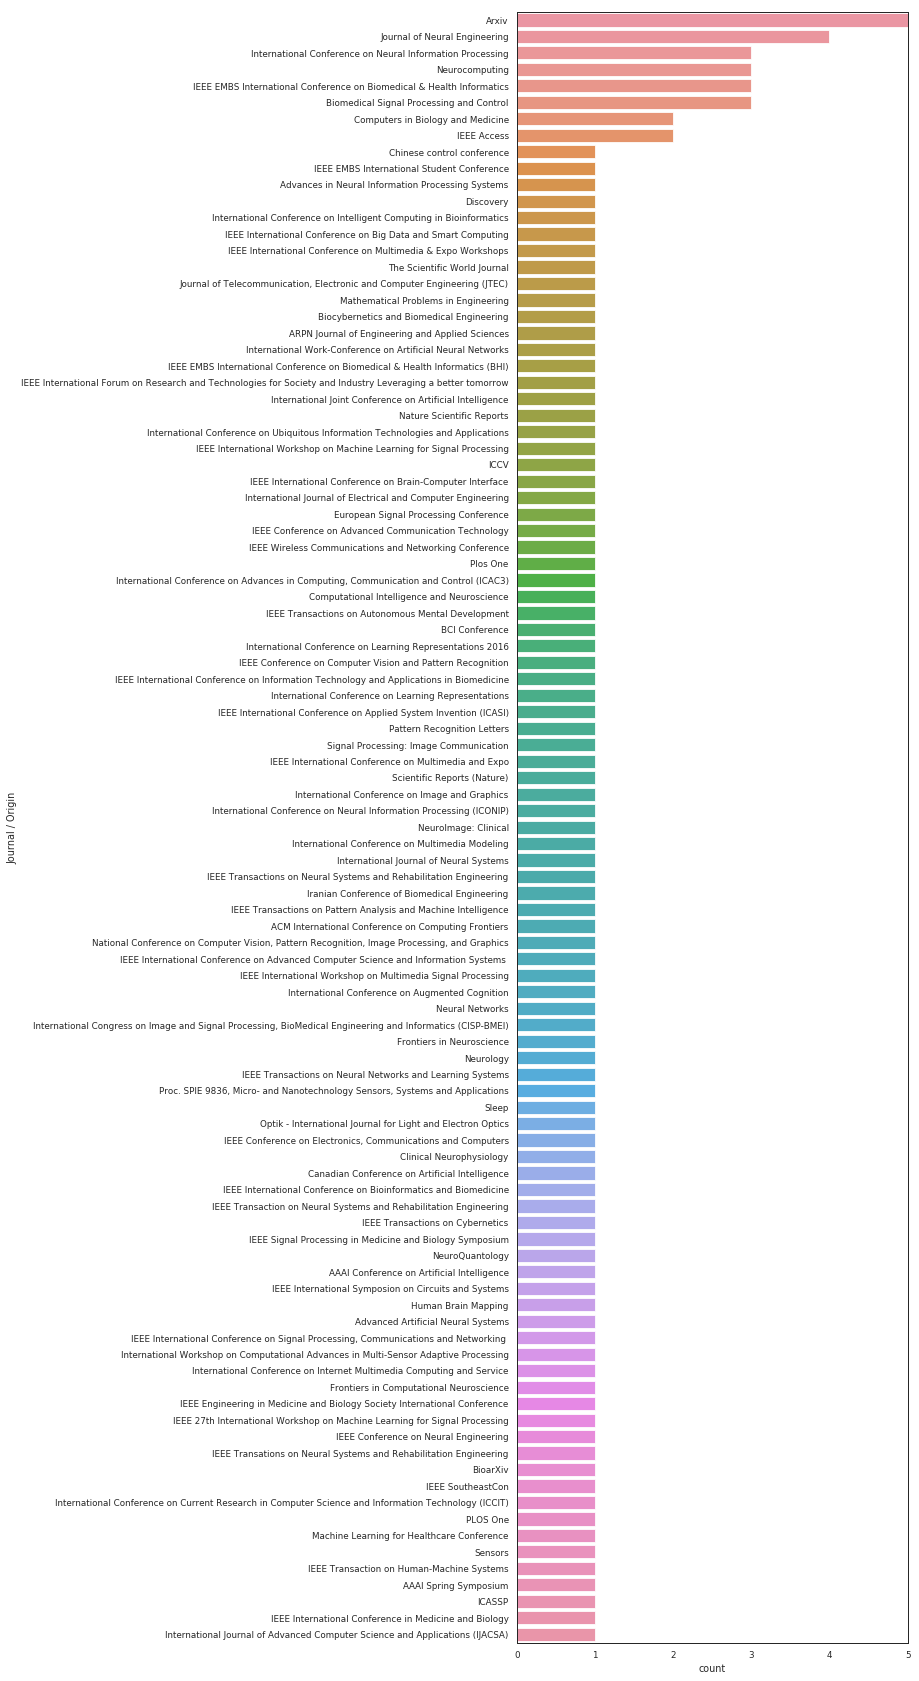

In [46]:
fig, ax = plt.subplots(figsize=(7, 30))
sns.countplot(y=data_items_df['Journal / Origin'], ax=ax,
              order=data_items_df['Journal / Origin'].value_counts().index)
ax.set_xlim([0, 5])

Text(0,0.5,'')

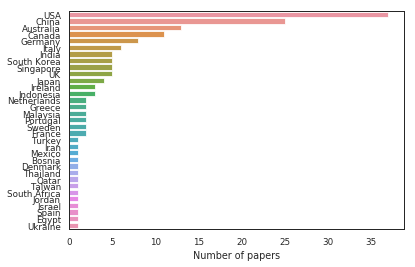

In [47]:
fig, ax = plt.subplots()
sns.countplot(y=data_items_df['Country'], ax=ax,
              order=data_items_df['Country'].value_counts().index)
ax.set_xlabel('Number of papers')
ax.set_ylabel('')

Text(0,0.5,'')

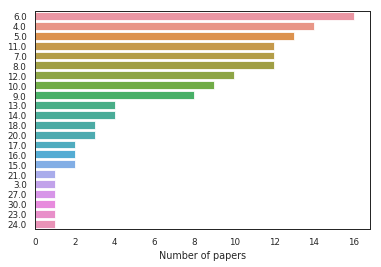

In [48]:
fig, ax = plt.subplots()
sns.countplot(y=data_items_df['Pages'], ax=ax,
              order=data_items_df['Pages'].value_counts().index)
ax.set_xlabel('Number of papers')
ax.set_ylabel('')

### Authors

In [49]:
# Separate rows that contain multiple values into multiple rows
def lstrip(list_of_strs):
    """Remove left space and make lowercase."""
    return [a.lstrip().lower() for a in list_of_strs] 

data_items_df['authors'] = data_items_df['Authors'].str.replace(' &', ',').str.split(',').apply(lstrip)

authors_per_article = list()
for i, items in data_items_df[['Citation', 'authors']].iterrows():
    for m in items['authors']:
        authors_per_article.append([i, items['Citation'], m])
        
authors_df = pd.DataFrame(authors_per_article, columns=['paper nb', 'Citation', 'author'])

Text(0,0.5,'')

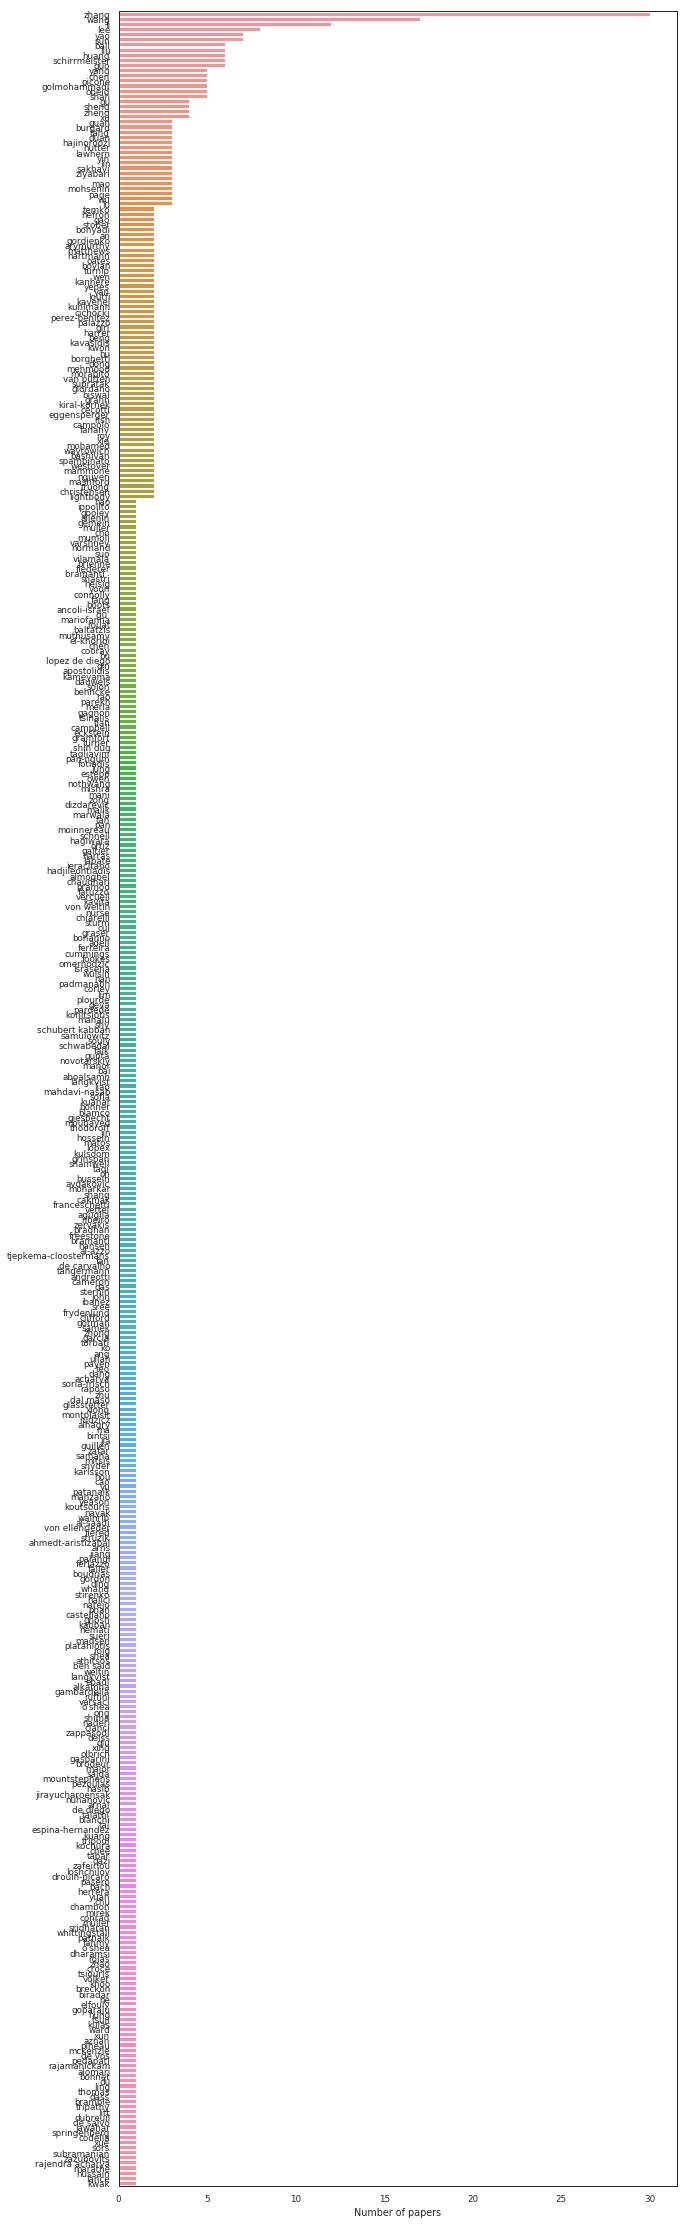

In [50]:
fig, ax = plt.subplots(figsize=(10, 40))
sns.countplot(y=authors_df['author'], ax=ax,
              order=authors_df['author'].value_counts().index)
ax.set_xlabel('Number of papers')
ax.set_ylabel('')

## Developing new bar graph to replace pie charts

## Making domains vs. architectures table

In [181]:
data_items_df = load_data_items(start_year=2010)
data_items_df.head()

,Title,Year,Authors,Journal / Origin,Preprint first,Type of paper,Lab / School / Company,Country,Pages,Domain 1,...,Model inspection (clean),Discussion,Limitations,Code available,Code hosted on,Limited data,Others & Comments,First Reader,Second Reader,Citation
0,EEG-signals based cognitive workload detection...,2018.0,"Almogbel, Dang & Kameyama",IEEE Conference on Advanced Communication Tech...,No,Conference,Waseda University,Japan,4.0,Classification of EEG signals,...,No,"""This study does not impose in any way a direc...",NaN,No,NaN,No,24 sessions of 15 to 30 minutes over 1 month o...,Yannick,Isabela,Almogbel2018
1,Automatic ocular artifacts removal in EEG usin...,2018.0,"Yang, Duan, Fan, Hu & Wang",Biomedical Signal Processing and Control,No,Journal,Key Laboratory of Power Station Automation Tec...,China,11.0,Improvement of processing tools,...,No,"""Compared with the classical OAs removal metho...",NaN,No,NaN,No,Poorly written... :( The way some elements are...,Yannick,Hubert,Yang2018
2,An end-to-end framework for real-time automati...,2018.0,"Patanaik, Ong, Gooley, Ancoli-Israel & Chee",Sleep,No,Journal,"Duke-NUS Medical School, Singapore\nUniversity...",Singapore,11.0,Classification of EEG signals,...,No,"""... our framework provides a practicable, val...",N/M,No,NaN,No,"Great paper, with most of the information avai...",Yannick,Hubert,Patanaik2018
3,Epileptic Seizure Detection: A Deep Learning A...,2018.0,"Hussein, Palangi, Ward & Wang",Arxiv,Yes,Preprint,UBC,Canada,12.0,Classification of EEG signals,...,No,"Compared to the state-of-the-art methods, this...",Unbalanced class distributions,No,NaN,No,"""To the best of our knowledge, this is the mos...",Yannick,Hubert,Hussein2018
4,Development of a brain computer interface inte...,2018.0,"Perez-Benitez, Perez-Benitez & Espina-Hernandez","IEEE Conference on Electronics, Communications...",No,Conference,"National Polytechnic Institute, Mexico",Mexico,7.0,Classification of EEG signals,...,Analysis of weights,The analysis of the DNN first layer weights re...,N/M,No,NaN,No,They say that it could go up to 220 commands!!...,Yannick,Hubert,Perez-Benitez2018


In [182]:
def replace_nans_in_column(df, column_name, replace_by=' '):
    nan_ind = df[column_name].apply(lambda x: np.isnan(x) if isinstance(x, float) else False)
    df.loc[nan_ind, column_name] = replace_by
    return df
    
# Replace NaNs by ' ' in 'Domain 3' and 'Domain 4' columns
data_items_df = replace_nans_in_column(data_items_df, 'Domain 3', replace_by=' ')
data_items_df = replace_nans_in_column(data_items_df, 'Domain 4', replace_by=' ')

In [183]:
# Add escape character in front of characters that happen to be special LaTeX characters
import re

def tex_escape(text):
    """
        :param text: a plain text message
        :return: the message escaped to appear correctly in LaTeX
        
        From https://stackoverflow.com/a/25875504
    """
    conv = {
        '&': r'\&',
        '%': r'\%',
        '$': r'\$',
        '#': r'\#',
        '_': r'\_',
        '{': r'\{',
        '}': r'\}',
        '~': r'\textasciitilde{}',
        '^': r'\^{}',
        '\\': r'\textbackslash{}',
        '<': r'\textless{}',
        '>': r'\textgreater{}',
    }
    regex = re.compile('|'.join(re.escape(str(key)) for key in sorted(conv.keys(), key = lambda item: - len(item))))
    return regex.sub(lambda match: conv[match.group()], text)

cols = ['Domain 1', 'Domain 2', 'Domain 3', 'Domain 4', 'Architecture (clean)']
data_items_df[cols] = data_items_df[cols].applymap(tex_escape)

In [189]:
# Make tuple of first 2 domain levels
domains_df = data_items_df.groupby(['Domain 1', 'Domain 2', 'Domain 3', 'Domain 4', 'Architecture (clean)'])[
                'Citation'].apply(list).apply(lambda x: '\cite{' + ', '.join(x) + '}').unstack()

domains_df = domains_df.applymap(lambda x: ' ' if isinstance(x, float) and np.isnan(x) else x)

with open('domains_architecture_table.tex', 'w') as f:
    with pd.option_context("max_colwidth", 1000):
        f.write(domains_df.to_latex(escape=False, column_format='p{1.5cm}' * 4 + 'p{0.6cm}' * domains_df.shape[1]))

In [186]:
domains_df

Architecture (clean)                                                                                                                                                    AE  \
Domain 1                        Domain 2                             Domain 3                Domain 4                                                                        
Classification of EEG signals   BCI                                                          Detection                                                                       
                                                                     Active                  Grasp and lift                                                                  
                                                                                             Mental tasks                                                                    
                                                                                             Motor imagery                                       \cite{Zhang2017a, Li2014}   
                                                                                             RSVP                                                                            
                                                                                             Slow cortical potentials                                                        
                                                                                             Speech decoding                                                                 
                                                                     Active \& Reactive      MI \& ERP                                                                       
                                                                     Reactive                ERP                                                                             
                                                                                             Heard speech decoding                                                           
                                                                                             RSVP                                                                            
                                                                                             SSVEP                                                \cite{Perez-Benitez2018}   
                                Clinical                             Alzheimer's disease                                                                                     
                                                                     Anomaly detection                                                                                       
                                                                     Dementia                                                                          \cite{Morabito2017}   
                                                                     Epilepsy                Detection                                  \cite{Yuan2018a, Golmohammadi2017}   
                                                                                             Event annotation                                                                
                                                                                             Prediction                                                                      
                                                                     Ischemic stroke                                                                                         
                                                                     Pathological EEG                                                                                        
                                                                     Schizophrenia           Detection                                                                      

## PRISMA diagram

In [40]:
from graphviz import Digraph

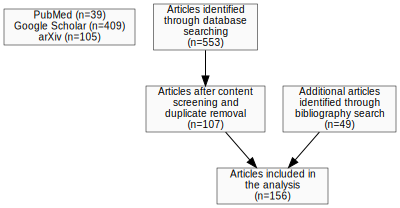

In [37]:
dot = Digraph(format='eps')
dot.attr('graph', rankdir='TB', overlap='false')
dot.attr('node', fontname='Liberation Sans', fontsize=str(10), shape='box', style='filled',
         margin='0.2,0.01', penwidth='0.5')

fillcolor = 'gray98'

dot.node('A', 'PubMed (n=39)\nGoogle Scholar (n=409)\narXiv (n=105)', fillcolor=fillcolor)
dot.node('B', 'Articles identified\nthrough database\nsearching\n(n=553)', fillcolor=fillcolor)
# dot.node('B2', 'Excluded\n(n=446)', fillcolor=fillcolor)
dot.node('C', 'Articles after content\nscreening and\nduplicate removal\n(n=107) ', fillcolor=fillcolor)
dot.node('D', 'Articles included in\nthe analysis\n(n=156)', fillcolor=fillcolor)
dot.node('E', 'Additional articles\nidentified through\nbibliography search\n(n=49)', fillcolor=fillcolor)

dot.edge('B', 'C')
# dot.edge('B', 'B2')
dot.edge('C', 'D')
dot.edge('E', 'D')

dot

## Number of subjects

In [8]:
def lstrip(list_of_strs, lower=True):
    """Remove left space and make lowercase."""
    return [a.lstrip().lower() if lower else a.lstrip() for a in list_of_strs]


def split_column_with_multiple_entries(df, col, ref_col='Citation', sep=';\n', lower=True):
    """Split the content of a column that contains more than one value per cell.
    
    Split the content of cells that contain more than one value. Some cells 
    contain two or more values for a single data item, e.g., 
        
        Number of subjects: '15, 203, 23'
        
    A DataFrame where each row contains a single value per cell is returned.
    
    Args:
        df (pd.DataFrame)
        col (str): name of the column to split
        
    Keyword Args:
        ref_col (str): identifier column to use to identify the row of
            origin of a splitted value.
        sep (str): separator between multiple values
        lower (bool): if True, make all values lowercase
        
    Returns:
        (pd.DataFrame)
    """
    df['temp'] = df[col].str.split(sep).apply(lstrip, lower=lower)
    
    value_per_row = list()
    for i, items in df[[ref_col, 'temp']].iterrows():
        for m in items['temp']:
            value_per_row.append([i, items[ref_col], m])

    return pd.DataFrame(value_per_row, columns=['paper nb', ref_col, col])

Text(0,0.5,'')

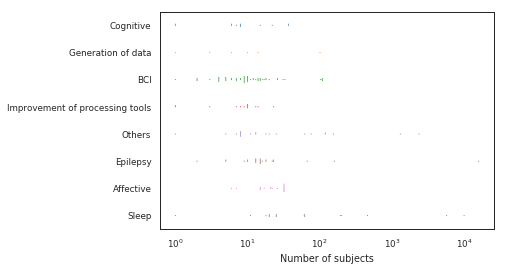

In [226]:
# Extract main domains
main_domains = ['Epilepsy', 'Sleep', 'BCI', 'Affective', 'Cognitive', 
                'Improvement of processing tools', 'Generation of data']
domains_df = data_items_df[['Domain 1', 'Domain 2', 'Domain 3', 'Domain 4']]
data_items_df['Main domain'] = [row[row.isin(main_domains)].values[0] 
    if any(row.isin(main_domains)) else 'Others' 
    for ind, row in domains_df.iterrows()]

# Split values into separate rows and remove invalid values
nb_subj_df = split_column_with_multiple_entries(data_items_df, 'Data - subjects', ref_col='Main domain')
nb_subj_df['Data - subjects'] = nb_subj_df['Data - subjects'].astype(int)
nb_subj_df = nb_subj_df.loc[nb_subj_df['Data - subjects'] > 0, :]

fig, ax = plt.subplots()
ax.set(xscale='log', yscale='linear')
sns.swarmplot(y='Main domain', x='Data - subjects', data=nb_subj_df, ax=ax, size=1,
            order=nb_subj_df.groupby(['Main domain'])['Data - subjects'].median().sort_values().index)
ax.set_xlabel('Number of subjects')
ax.set_ylabel('')

## Number of EEG channels and hardware

In [245]:
# 2) Extract # channels
# 3) Make matrix
# 4) Plot

In [7]:
# Extract vendor
hardware_df = split_column_with_multiple_entries(
    data_items_df, 'EEG Hardware', ref_col='Citation', sep=',', lower=False)

def extract_vendor_from_hardware(s):
    if s != 'N/M':
        return s[s.find('(') + 1:s.find(')')]
    else:
        return 'N/M'
    
hardware_df['vendor'] = hardware_df['EEG Hardware'].apply(extract_vendor_from_hardware)
hardware_df.shape

NameError: name 'split_column_with_multiple_entries' is not defined

In [278]:
nb_channels_df = split_column_with_multiple_entries(
    data_items_df, 'Nb Channels', ref_col='Citation', sep=';\n', lower=False)
nb_channels_df['Nb Channels'] = nb_channels_df['Nb Channels'].astype(int)
nb_channels_df = nb_channels_df.loc[nb_channels_df['Nb Channels'] > 0, :]

fs_df = split_column_with_multiple_entries(
    data_items_df, 'Sampling rate', ref_col='Citation', sep=';\n', lower=False)
fs_df['Sampling rate'] = fs_df['Sampling rate'].astype(float)
fs_df = fs_df.loc[fs_df['Sampling rate'] > 0, :]

In [296]:
device_fs_df = fs_df[['Sampling rate']]
device_fs_df = device_fs_df.rename(columns={'Sampling rate': 'value'})
device_fs_df['type'] = 'Sampling rate'

In [299]:
device_ch_df = nb_channels_df[['Nb Channels']]
device_ch_df = device_ch_df.rename(columns={'Nb Channels': 'value'})
device_ch_df['type'] = 'Number of channels'

Text(0,0.5,'Number of papers')

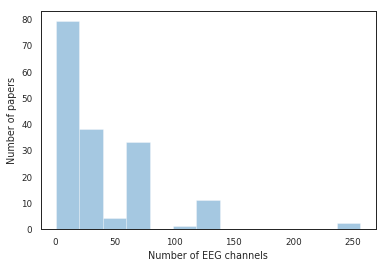

In [313]:
fig, ax = plt.subplots()
sns.distplot(nb_channels_df['Nb Channels'], kde=False, norm_hist=False, ax=ax)
ax.set_xlabel('Number of EEG channels')
ax.set_ylabel('Number of papers')

## Cross-validation

In [123]:
data_items_df = load_data_items()

In [42]:
data_items_df[col] = data_items_df[col].fillna('N/M')
data_items_df[col].unique()

array(['Leave-One-Session-Out', 'No', 'Yes', 'k-fold', 'TBD',
       'Leave-One-Subject-Out', 'k-fold;\nLeave-One-Subject-Out', 'N/M',
       'Leave-One-Session-Out;\nLeave-One-Subject-Out',
       'Train-Valid-Test', 'k-fold;\nLeave-N-Subjects-Out',
       'Leave-N-Subjects-Out', 'Leave-N-Samples-Out',
       'Monte-Carlo k-fold', '3-fold',
       'Leave-One-Subject-Out;\nLeave-N-Samples-Out',
       'Leave-One-Sample-Out;\nLeave-One-Subject-Out',
       'Leave-One-Subject-Out;\nLeave-One-Session-Out'], dtype=object)

In [45]:
col = 'Cross validation (clean)'
data_items_df[col] = data_items_df[col].fillna('N/M')
cv_df = split_column_with_multiple_entries(
    data_items_df, col, ref_col='Citation', sep=';\n', lower=False)

In [47]:
cv_df[col].value_counts().index

Index(['No', 'k-fold', 'Leave-One-Subject-Out', 'TBD', 'Train-Valid-Test',
       'Leave-One-Session-Out', 'N/M', 'Leave-N-Subjects-Out',
       'Leave-N-Samples-Out', 'Yes', '3-fold', 'Monte-Carlo k-fold',
       'Leave-One-Sample-Out'],
      dtype='object')

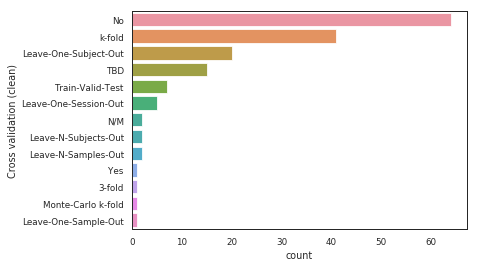

In [48]:
sns.countplot(y=cv_df[col], order=cv_df[col].value_counts().index)

## Intra vs intersubject

In [50]:
data_items_df['Intra/Inter subject'].value_counts()

Inter           95
Intra           39
Both            13
N/M              6
Intra\n(TBC)     1
Name: Intra/Inter subject, dtype: int64

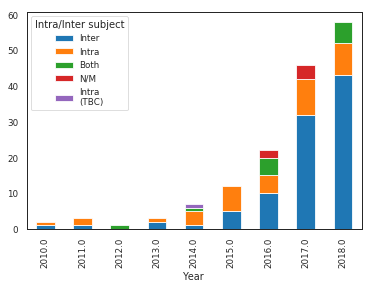

In [57]:
col = 'Intra/Inter subject'
counts = data_items_df.groupby(['Year', col]).size().unstack(col)
order = data_items_df[col].value_counts().index
counts = counts[order]
counts.plot(kind='bar', stacked=True, title='')
ax.legend()

## Dataset table

In [124]:
def split_column_with_multiple_entries(df, col, ref_col='Citation', sep=';\n', lower=True):
    """Split the content of a column that contains more than one value per cell.
    
    Split the content of cells that contain more than one value. Some cells 
    contain two or more values for a single data item, e.g., 
        
        Number of subjects: '15, 203, 23'
        
    A DataFrame where each row contains a single value per cell is returned.
    
    Args:
        df (pd.DataFrame)
        col (str): name of the column to split
        
    Keyword Args:
        ref_col (str or list of str): identifier column(s) to use to identify 
            the row of origin of a splitted value.
        sep (str): separator between multiple values
        lower (bool): if True, make all values lowercase
        
    Returns:
        (pd.DataFrame)
    """
    df['temp'] = df[col].str.split(sep).apply(lstrip, lower=lower)
    
    if not isinstance(ref_col, list):
        ref_col = [ref_col]
    
    value_per_row = list()
    for i, items in df[[*ref_col, 'temp']].iterrows():
        for m in items['temp']:
            value_per_row.append([i, *items[ref_col].tolist(), m])

    return pd.DataFrame(value_per_row, columns=['paper nb', *ref_col, col])

Number of articles  \
Main domain                     Dataset                                    
Affective                       DEAP                                   9   
                                SEED                                   3   
BCI                             BCI Competition                       13   
                                Other                                  8   
                                eegmmidb                               8   
                                Keirn & Aunon (1989)                   2   
                                MAHNOB                                 1   
Cognitive                       Other                                  4   
                                EEG Eye State                          1   
Epilepsy                        CHB-MIT                                9   
                                Bonn University                        7   
                                TUH                                    5   
                                Other                                  3   
                                Freiburg Hospital                      2   
Generation of data              BCI Competition                        2   
                                MAHNOB                                 1   
                                Other                                  1   
                                SEED                                   1   
Improvement of processing tools BCI Competition                        3   
                                Other                                  2   
                                Bonn University                        1   
                                CHB-MIT                                1   
Others                          TUH                                    3   
                                eegmmidb                               3   
                                Other                                  2   
                                EEG Eye State                          1   
Sleep                           MASS                                   4   
                                Sleep EDF                              4   
                                Other                                  3   
                                UCDDB                                  3   

                                                                                             References  
Main domain                     Dataset                                                                  
Affective                       DEAP                  \cite{Li2018, Alhagry2017, BenSaid2017a, Lin20...  
                                SEED                               \cite{Zhang2018, Liu2016, Zheng2015}  
BCI                             BCI Competition       \cite{Gao2018, Lawhern2018, Sakhavi2017, Schir...  
                                Other                 \cite{Hasib2018, Lawhern2018, Schirrmeister201...  
                                eegmmidb              \cite{Zhang2018c, Major2017, Zhang2017g, Zhang...  
                                Keirn & Aunon (1989)                  \cite{Padmanabh2017, Patnaik2017}  
                                MAHNOB                                           \cite{drouin2016using}  
Cognitive                       Other                 \cite{Kuanar2018, Hajinoroozi2015, Hajinoroozi...  
                                EEG Eye State                                         \cite{Narejo2016}  
Epilepsy                        CHB-MIT               \cite{Yan2018, Tsiouris2018, Yuan2018a, Truong...  
                                Bonn University       \cite{Hussein2018, Ullah2018, Ahmedt-Aristizab...  
                                TUH                   \cite{Golmohammadi2017b, Shah2017, Golmohammad...  
                                Other                    \cite{Truong2018, Golmohammadi2017a, Taqi2017}  
                               